# 대중소 괄호 짝 맞추기

여섯 가지 괄호 '(', ')', '{', '}', '[', ']'로 이루어진 문자열이 바르게 닫힌 문자열인지 알아보려 합니다. 바르게 닫힌 문자열이라는 것은

'(' 문자로 열렸으면 반드시 짝지어서 ')' 문자로,
'[' 문자로 열렸으면 반드시 짝지어서 ']' 문자로,
'{' 문자로 열렸으면 반드시 짝지어서 '}' 문자로
닫히는 문자열입니다. 또한, 괄호 쌍 안에는 다른 괄호 쌍이 들어갈 수 있습니다. 예를 들어,

{{}}, ({})[]는 바르게 닫힌 괄호입니다.
[), ]()[, ([())]는 바르게 닫히지 않은 괄호입니다.
문자열 s가 주어졌을 때, 문자열 s가 바르게 닫힌 괄호이면 true를, 그렇지 않으면 false를 return 하는 solution 함수를 완성해 주세요.

**제한사항**
- 문자열 s는 (, ), {, }, [, ] 로만 이루어졌습니다.
- 문자열 s의 길이는 1 이상 40 이하입니다.

**입출력 예**

|s | answer|
|:---:|:---:|
|"{{}}"|	true|
|"({})[]"|	true|
|"[)"|	false|
|"]()["|	false|
|"([())]"|	false|


##### 1차 시도

- 문자열 s를 리스트 변환 후 닫는 괄호, 여는 괄호를 정렬해서 반복문을 돌며 마지막 요소를 비교해서 여는 괄호, 닫는 괄호 쌍을 이루는지 체크하는 로직


- **다른 괄호 중간에 괄호가 들어가는 경우 괄호 쌍이 완성되야하는 것을 체크했어야함**


In [25]:
s = '([())]'
s_list = list(s)
closed_form = [form for form in s_list if form in ['}', ']', ')']]
opening_form = [form for form in s_list if form in ['{', '[', '(']]

In [26]:
closed_form

[')', ')', ']']

In [27]:
opening_form

['(', '[', '(']

In [31]:
# 오답
def solution(s):
    
    closed_form = sorted([form for form in list(s) if form in ['}', ']', ')']])
    opening_form = sorted([form for form in list(s) if form in ['{', '[', '(']])

    if len(closed_form) != len(opening_form):
        return False
    
    while closed_form:
        c = closed_form.pop()
        if c == ']' and opening_form[-1] != "[":
            return False
        elif c == '}' and opening_form[-1] != "{":
            return False
        elif c == ')' and opening_form[-1] != "(":
            return False
        opening_form.pop()

    return True

##### 2차 시도

- **다른 괄호 중간에 괄호가 들어가는 경우 괄호 쌍이 완성되야하는 것을 체크했어야함**
    
    - 여는 괄호 다음 요소가 여는 괄호('(', '{', '[')                 
    
    - 여는 괄호 다음 요소가 닫는 괄호 (여는 괄호와 쌍이 맞는 경우에만 True)
    
    
- 탐색을 마치고 스택이 비어있다면 True 남아있다면 False(여는괄호가 남아있는경우)

In [50]:
def solution(s):
    stack = []
    opening = ['{', '[', '(']
    closing = ['}', ']', ')']
    temp_dict = {elem[0] : elem[1] for elem in zip(opening, closing)}
    
    for c in s:
        if c in opening_list: # 여는 괄호가 오는 경우 stack에 저장한다.
            stack.append(c)
        elif c in closing_list: # 닫는 괄호가 오는 경우 스택이 비어있는지 여부에 따라 케이스를 나눈다.
            if not stack: 
                return False
            else: # 스택에 요소가 존재하는 경우 닫는 괄호(c)가 스택의 여는 괄호와 pair를 이루면 스택을 pop하고 아니면 False를 리턴한다.
                if temp_dict[stack[-1]] == c:
                    stack.pop()
                else:
                    return False
    
    return True if len(stack) == 0 else False

In [52]:
assert solution("{{}}") == True
assert solution("({})[]") == True
assert solution("[)") == False
assert solution("]()[") == False
assert solution("([())]") ==False

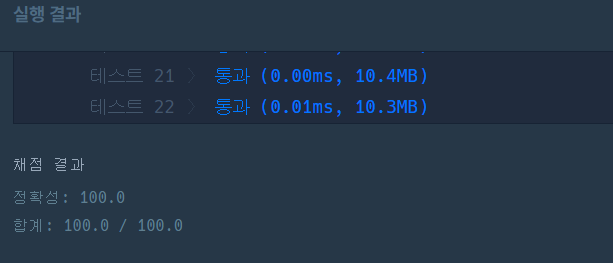